In [272]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_df = pd.read_csv("data/ride_data.csv")

city_df = pd.read_csv("data/city_data.csv")

ride_df.head()

# Combine the data into a single dataset
merge_df1 = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview
merge_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

       type           city  ride_id       fare  driver_count
0     Urban    Amandaburgh       18  24.641667           216
1     Urban    Barajasview       22  25.332273           572
2  Suburban  Barronchester       16  36.422500           176
3  Suburban    Bethanyland       18  32.956111           396
4     Rural   Bradshawfurt       10  40.064000            70


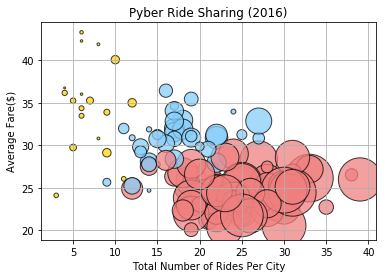

In [273]:
# Obtain the x and y coordinates for each of the three city types

# need to calculate: 
    #x_axis: total rides per city

tot_city_rides = pd.DataFrame(merge_df.groupby(["city","type"])["ride_id"].count())
tot_city_rides

avg_city_fares = pd.DataFrame(merge_df.groupby(["city","type"])["fare"].mean())
avg_city_fares

dv_count= pd.DataFrame(merge_df.groupby(["city","type"])["driver_count"].sum())

#print(pd.DataFrame(tot_city_rides).head())   
#print(pd.DataFrame(avg_city_fares).head())    
merge_df2 = pd.merge(tot_city_rides, avg_city_fares, on= ["city","type"])
merge_df3 = pd.merge(merge_df2,dv_count,on= ["city","type"])

df4=pd.DataFrame(merge_df3)#,columns=["city","type","ride_id","fare","driver_count"])
df4.reset_index(level=0, inplace=True)
df4.reset_index(level=0, inplace=True)

print(df4.head())
categories = np.unique(df4['type'])
#colors = np.linspace(200, 34, len(categories))
colors = ["gold", "lightskyblue", "lightcoral"]
colordict = dict(zip(categories, colors)) 
df4["Color"] = df4['type'].apply(lambda x: colordict[x])
#print(colordict)

plt.scatter(df4['ride_id'], df4['fare'],
           s=df4['driver_count'],c=df4['Color'],edgecolor="black", alpha=0.75
)


plt.title("Pyber Ride Sharing (2016)")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare($)")
plt.grid(True)

plt.show()

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [274]:
# Show plot
plt.show()

## Total Fares by City Type

total fare: 63538.64
rural percent fare: 6.811492974983412%
suburban percent fare: 30.46387206273221%
urban percent fare: 62.72463496228436%


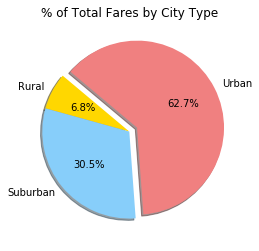

In [275]:
# Calculate Type Percents
tot_fare_type = merge_df["fare"].sum()
print("total fare: " + str(tot_fare_type))
fare_by_type_df = pd.DataFrame(merge_df.groupby("type")["fare"].sum())

fare_by_type_df.reset_index(level=0, inplace=True)
fare_by_type_df

# calculate PCTs
rural_pct = (((fare_by_type_df.iloc[0,1])/tot_fare_type) * 100)
print("rural percent fare: " + str(rural_pct)+ "%")
suburban_pct = (((fare_by_type_df.iloc[1,1])/tot_fare_type) * 100)
print("suburban percent fare: " + str(suburban_pct) + "%")
urban_pct = (((fare_by_type_df.iloc[2,1])/tot_fare_type) * 100)
print("urban percent fare: " + str(urban_pct) + "%")

# plot pie chart

labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_pct, suburban_pct, urban_pct]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()
    

In [276]:
# Show Figure


## Total Rides by City Type

total ride count: 2375
rural percent fare: 5.263157894736842%
suburban percent fare: 26.31578947368421%
urban percent fare: 68.42105263157895%


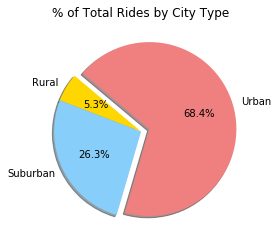

In [277]:
# Calculate Ride Percents

ride_type_count = merge_df["ride_id"].count()
print("total ride count: " + str(ride_type_count))

tot_rides_by_type_df = pd.DataFrame(merge_df.groupby("type")["ride_id"].count())
tot_rides_by_type_df.reset_index(level=0, inplace=True)
tot_rides_by_type_df

# calculate PCTs
rural_ride_pct = (((tot_rides_by_type_df.iloc[0,1])/ride_type_count) * 100)
print("rural percent fare: " + str(rural_ride_pct)+ "%")
suburban_ride_pct = (((tot_rides_by_type_df.iloc[1,1])/ride_type_count) * 100)
print("suburban percent fare: " + str(suburban_ride_pct) + "%")
urban_ride_pct = (((tot_rides_by_type_df.iloc[2,1])/ride_type_count) * 100)
print("urban percent fare: " + str(urban_ride_pct) + "%")

# plot pie chart

labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_ride_pct, suburban_ride_pct, urban_ride_pct]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()
    


# Build Pie Chart

# Save Figure


In [278]:
# Show Figure
plt.show()

## Total Drivers by City Type

totat driver count :2973
rural percent driver count: 2.6236125126135215%
suburban percent driver count: 16.481668348469558%
urban percent driver count: 80.89471913891691%


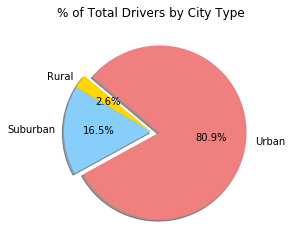

In [279]:
# Calculate Driver Percents
tot_driver_count = city_df["driver_count"].sum()
print("totat driver count :" + str(tot_driver_count))
driver_count_type_df = pd.DataFrame((city_df.groupby)("type")["driver_count"].sum())
driver_count_type_df.reset_index(level=0, inplace=True)
driver_count_type_df

# calculate pct
# calculate PCTs
rural_driver_count_pct = (((driver_count_type_df.iloc[0,1])/tot_driver_count) * 100)
print("rural percent driver count: " + str(rural_driver_count_pct)+ "%")
suburban_driver_count_pct = (((driver_count_type_df.iloc[1,1])/tot_driver_count) * 100)
print("suburban percent driver count: " + str(suburban_driver_count_pct) + "%")
urban_driver_count_pct = (((driver_count_type_df.iloc[2,1])/tot_driver_count) * 100)
print("urban percent driver count: " + str(urban_driver_count_pct) + "%")

# Build Pie Charts
# plot pie chart

labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rural_driver_count_pct, suburban_driver_count_pct, urban_driver_count_pct]

# The colors of each section of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()
    
# Save Figure
#merge_df3

In [280]:
# Show Figure
plt.show()